In this mission, we'll focus on the impact of increasing k, the number of nearby neighbors the model uses to make predictions. We exported both the training (train_df) and test sets (test_df) from the last missions to CSV files, dc_airbnb_train.csv and dc_airbnb_test.csv respectively. Let's read both these CSV's into Dataframes.

### Instructions
1. Read dc_airbnb_train.csv into a Dataframe and assign to train_df.

2. Read dc_airbnb_test.csv into a Dataframe and assign to test_df.

In [2]:
import pandas as pd 
import numpy as np 

In [3]:
train_df = pd.read_csv('dc_airbnb_train.csv') 
test_df = pd.read_csv('dc_airbnb_test.csv') 

In [4]:
train_df.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,-0.596544,-0.249467,-0.439151,-0.546858,125.0,-0.341375,-0.016604,4.579650
1,-0.596544,-0.249467,0.412923,-0.546858,85.0,-0.341375,-0.016603,1.159275
2,-1.095499,-0.249467,-1.291226,-0.546858,50.0,-0.341375,-0.016573,-0.482505
3,-0.596544,-0.249467,-0.439151,-0.546858,209.0,0.487635,-0.016584,-0.448301
4,4.393004,4.507903,1.264998,2.829956,215.0,-0.065038,-0.016553,0.646219


In [5]:
test_df.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,-0.596544,-1.438810,-0.439151,-0.546858,105.0,-0.341375,-0.016548,-0.243079
1,0.900320,0.939875,1.264998,0.297345,309.0,0.487635,-0.016594,-0.243079
2,-0.596544,-0.249467,2.117072,-0.546858,55.0,-0.341375,-0.016573,0.714626
3,-0.596544,-0.249467,-0.439151,-0.546858,180.0,-0.341375,-0.016573,-0.448301
4,-0.596544,-0.249467,-0.439151,-0.546858,130.0,-0.341375,-0.016573,-0.448301


### Hyperparameter optimization

When we vary the features that are used in the model, we're affecting the data that the model uses. On the other hand, varying the k value affects the behavior of the model independently of the actual data that's used when making predictions. 

In other words, we're impacting how the model performs without trying to change the data that's used.
Values that affect the behavior and performance of a model that are unrelated to the data that's used are referred to as hyperparameters. 

The process of finding the optimal hyperparameter value is known as hyperparameter optimization.

A simple but common hyperparameter optimization technique is known as grid search, which involves:
1. selecting a subset of the possible hyperparameter values,
2. training a model using each of these hyperparameter values,
3. evaluating each model's performance,
4. selecting the hyperparameter value that resulted in the lowest error value.

Grid search essentially boils down to evaluating the model performance at different k values and selecting the k value that resulted in the lowest error. 

While grid search can take a long time when working with large datasets, the data we're working with in this mission is small and this process is relatively quick.

Let's confirm that grid search will work quickly for the dataset we're working with by first observing how the model performance changes as we increase the k value from 1 to 5.

If you recall, we set 5 as the k value for the last 2 missions. Let's use the features from the last mission that resulted in the best model accuracy:
1. accommodates
2. bedrooms
3. bathrooms
4. number_of_reviews

### Instructions
1. Create a list containing the integer values 1, 2, 3, 4, and 5, in that order, and assign to hyper_params.
2. Create an empty list and assign to mse_values.
3. Use a for loop to iterate over hyper_params and in each iteration:
4. Instantiate a KNeighborsRegressor object with the following parameters:
n_neighbors: the current value for the iterator variable,algorithm: brute

Fit the instantiated k-nearest neighbors model to the following columns from train_df:

1. accommodates
2. bedrooms
3. bathrooms
4. number_of_reviews

Use the trained model to make predictions on the same columns from test_df and assign to predictions.

Use the mean_squared_error function to calculate the MSE value between predictions and the price column from test_df.

Append the MSE value to mse_values.

Display mse_values using the print() function.

In [6]:
hyper_params = [1,2,3,4,5]
mse_values = [] 

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [8]:
features = ['accommodates', 'bedrooms','bathrooms', 'number_of_reviews'] 

In [9]:
from sklearn.neighbors import KNeighborsRegressor
for k in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    train_features = train_df[features] 
    train_target = train_df['price']
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[features])
    MSE = mean_squared_error(test_df['price'] , predictions)
    mse_values.append(MSE)

In [10]:
mse_values 

[26375.956769055745,
 15139.457906712172,
 14658.641006193906,
 15344.293017633674,
 14206.590534698522]

### Expanding grid search

Since our dataset is small and scikit-learn has been developed with performance in mind, the code ran quickly. As we increased the k value from 1 to 5, the MSE value fell from approximately 26364 to approximately 14090:

Let's expand grid search all the way to a k value of 20. While 20 may seem like an arbitrary ending point for our grid search, we can always expand the values we try if we're unconvinced that the lowest MSE value is associated with one of the hyperparameter values we tried so far.

In [11]:
hyper_params = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
mse_values = [] 

In [12]:
from sklearn.neighbors import KNeighborsRegressor
for k in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    train_features = train_df[features] 
    train_target = train_df['price']
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[features])
    MSE = mean_squared_error(test_df['price'] , predictions)
    mse_values.append(MSE)

In [13]:
mse_values 

[26375.956769055745,
 15139.457906712172,
 14658.641006193906,
 15344.293017633674,
 14206.590534698522,
 13648.805839969662,
 13697.820319936849,
 13680.103455631399,
 13737.320678661215,
 13902.059260523321,
 14170.903647082052,
 14327.446229933006,
 14382.902794326528,
 14392.447772282978,
 14446.81414738971,
 14517.986019269056,
 14564.293802724866,
 14540.731502549192,
 14595.037643507007,
 14548.932528441412]

### Visualizing hyperparameter values

As we increased the k value from 1 to 6, the MSE value decreased from approximately 26364 to approximately 13657. However, as we increased the k value from 7 to 20, the MSE value didn't decrease further but instead hovered between approximately 14288 and 14870. This means that the optimal k value is 6, since it resulted in the lowest MSE value.
This pattern is something you'll notice while performing grid search across other models as well. As you increase k at first, the error rate decreases until a certain point, but then rebounds and increases again. Let's confirm this behavior visually using a scatter plot.

In [14]:
import matplotlib.pyplot as plt 
%matplotlib inline 

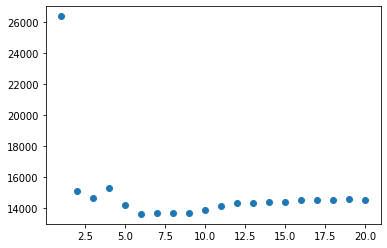

In [15]:
plt.scatter(hyper_params, mse_values) 
plt.show() 

#### Varying Hyperparameters

From the scatter plot, you can tell that the lowest MSE value was achieved at the k value of 6. As we increased k past 6, the MSE actually increased and hovered but never decreased below 13657 (the approximate MSE value when k was 6).
Since varying the k value decreased the MSE value for this model, you may be wondering if repeating the grid search process for one of the models from the last mission that performed poorly when we fixed k to 5 would result in a lower MSE value. Let's try it out!

### Instructions

Use a for loop to iterate over hyper_params and in each iteration:

Instantiate a KNeighborsRegressor object with the following parameters:

n_neighbors: the current value for the iterator variable,
algorithm: brute

Fit the instantiated k-nearest neighbors model to all of the columns, except for the price column, from train_df

Use the trained model to make predictions on the same columns from test_df and assign to predictions.
Use the mean_squared_error function to calculate the MSE value between predictions and the price column from test_df.

Append the MSE value to mse_values.
Use the scatter() method from matplotlib.pyplot to generate a line plot with:

hyper_params on the x-axis,
mse_values on the y-axis.
Use plt.show() to display the line plot.

In [16]:
hyper_params = [x for x in range(1,21)]
mse_values = [] 

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [18]:
features = train_df.columns.tolist()
features.remove('price')

In [19]:
for k in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    train_features = train_df[features] 
    train_target = train_df['price']
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[features])
    MSE = mean_squared_error(test_df['price'] , predictions)
    mse_values.append(MSE)

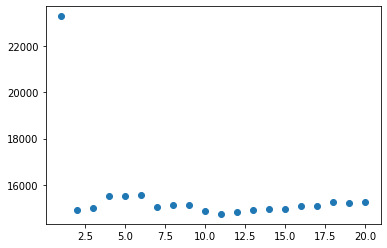

In [20]:
plt.scatter(hyper_params, mse_values) 
plt.show() 

#### Practice the workflow

### Instructions
While using only the accommodates and bathrooms columns:

Train a model for each k value between 1 and 20 using the training data.

Use each model to make predictions on the test set (using just the accommodates and bathrooms columns).

Calculate each model's MSE value by comparing each set of predictions to the true price values.

Find the k value that obtained the lowest MSE value.

Create a dictionary named two_hyp_mse that contains 1 key-value pair:

key: k value that resulted in lowest MSE value.

value: corresponding MSE value.

Repeat this process while using only the accommodates, bathrooms, and bedrooms columns:

Create a dictionary named three_hyp_mse that contains 1 key-value pair:

key: k value that resulted in lowest MSE value.

value: corresponding MSE value.
Display both two_hyp_mse and three_hyp_mse using the print() function.

In [21]:
two_hyp_mse = {} 

In [22]:
features = ['accommodates', 'bathrooms'] 

In [23]:
for k in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    train_features = train_df[features] 
    train_target = train_df['price']
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[features])
    MSE = mean_squared_error(test_df['price'] , predictions)
    two_hyp_mse[k] = MSE

In [24]:
two_hyp_mse 

{1: 26921.881683731513,
 2: 20517.14306029579,
 3: 16107.99469093667,
 4: 15654.716368031854,
 5: 14982.729010238909,
 6: 15300.232903552018,
 7: 15631.643240231246,
 8: 15722.948769908988,
 9: 15547.871571229933,
 10: 15303.853321956767,
 11: 16858.303754266213,
 12: 16522.273179749714,
 13: 16497.735350149105,
 14: 16671.212225163104,
 15: 16933.936316521296,
 16: 16876.78208546644,
 17: 16968.842121630823,
 18: 16901.506127192795,
 19: 17605.229945260133,
 20: 17546.13771331058}

In [25]:
low = min(two_hyp_mse.values()) 
low

14982.729010238909

In [26]:
min(two_hyp_mse.items(), key= lambda x:x[1]) 

(5, 14982.729010238909)

lambda effectively creates an inline function. For example, you can rewrite this example:

max(gs_clf.grid_scores_, key=lambda x: x[1])

Using a named function:

def element_1(x):

    return x[1]

max(gs_clf.grid_scores_, key=element_1)

In this case, max() will return the element in that array whose second element (x[1]) is larger than all of the other elements' second elements. Another way of phrasing it is as the function call implies: return the max element, using x[1] as the key.

In [27]:
def element_1(x):
    return x[1]

In [28]:
element_1(two_hyp_mse) 

26921.881683731513

In [29]:
two_hyp_mse.items() 

dict_items([(1, 26921.881683731513), (2, 20517.14306029579), (3, 16107.99469093667), (4, 15654.716368031854), (5, 14982.729010238909), (6, 15300.232903552018), (7, 15631.643240231246), (8, 15722.948769908988), (9, 15547.871571229933), (10, 15303.853321956767), (11, 16858.303754266213), (12, 16522.273179749714), (13, 16497.735350149105), (14, 16671.212225163104), (15, 16933.936316521296), (16, 16876.78208546644), (17, 16968.842121630823), (18, 16901.506127192795), (19, 17605.229945260133), (20, 17546.13771331058)])

lambda signifies an anonymous function. In this case, this function takes the single argument x and returns x[1] (i.e. the item at index 1 in x).

Now, sort(mylist, key=lambda x: x[1]) sorts mylist based on the value of key as applied to each element of the list. Similarly, max(gs_clf.grid_scores_, key=lambda x: x[1]) returns the maximum value of gs_clf.grid_scores_ with respect to whatever is returned by key for each element.

I should also point out that this particular function is already included in one of the libraries: operator. Specifically, operator.itemgetter(1) is equivalent to your key.

In [30]:
features = ['accommodates','bathrooms','bedrooms'] 

In [31]:
three_hyp_mse = {} 

In [32]:
for k in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    train_features = train_df[features] 
    train_target = train_df['price']
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[features])
    MSE = mean_squared_error(test_df['price'] , predictions)
    three_hyp_mse[k] = MSE

In [33]:
three_hyp_mse 

{1: 25413.37201365188,
 2: 19815.342150170647,
 3: 15599.903299203641,
 4: 14420.401806029578,
 5: 13325.764914675767,
 6: 13399.56459360384,
 7: 13450.795802279958,
 8: 13568.966296928327,
 9: 13818.5672972935,
 10: 13978.267155858928,
 11: 14107.940005077144,
 12: 14258.339653646819,
 13: 14402.136330283873,
 14: 14529.705648812424,
 15: 14703.33702439641,
 16: 14831.683389327362,
 17: 14936.121461553905,
 18: 14956.06453742328,
 19: 15004.98553190953,
 20: 14960.773816837316}

In [34]:
min(three_hyp_mse.items(), key = lambda x:x[1])

(5, 13325.764914675767)

In [35]:
enumerate(mse_values) 

In [36]:
two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = [x for x in range(1,21)]
# Append the first model's MSE values to this list.
two_mse_values = list()
# Append the second model's MSE values to this list.
two_hyp_mse_full = dict() 
three_hyp_mse_full = dict() 
two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = [x for x in range(1,21)]
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

for k in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    train_features = train_df[two_features] 
    train_target = train_df['price']
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[two_features])
    MSE = mean_squared_error(test_df['price'] , predictions)
    two_hyp_mse_full[k] = MSE
    
t_hyp_mse = min(two_hyp_mse_full.items(), key= lambda x:x[1]) 
two_hyp_mse = dict([t_hyp_mse]) 

for k in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    train_features = train_df[three_features] 
    train_target = train_df['price']
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[three_features])
    MSE = mean_squared_error(test_df['price'] , predictions)
    three_hyp_mse_full[k] = MSE

t_hyp_mse = min(three_hyp_mse_full.items(), key = lambda x:x[1])
three_hyp_mse = dict([t_hyp_mse]) 


In [37]:
print(two_hyp_mse) 
print(three_hyp_mse) 

{5: 14982.729010238909}
{5: 13325.764914675767}
